In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, confusion_matrix, classification_report, accuracy_score

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard.csv")

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#normalization
df['scaled_amount'] =(df['Amount'] - df['Amount'].min())/ (df['Amount'].max() - df['Amount'].min())
df['scaled_Time'] = (df['Time'] - df['Time'].min())/ (df['Time'].max() - df['Time'].min())

In [ ]:
print(len(df[df['Class']==0]))
print(len(df[df['Class']==1]))
df = df.drop(['Amount','Time'], axis=1)

284315
492


In [ ]:
#dividing dataframe into 10 folds with equal size(147) of test and train data

folds= 10 
fold_list =[]

fold_size = 3*len(df[df.Class==1])//folds
for i in range(folds):
  fold = pd.DataFrame()
  class0 = df[df.Class==0].sample(n = fold_size)
  class1 = df[df.Class==1].sample(n = fold_size)
  fold = pd.concat([class0,class1])
  fold = fold.sample(frac=1).reset_index(drop=True)
  fold_list.append(fold)


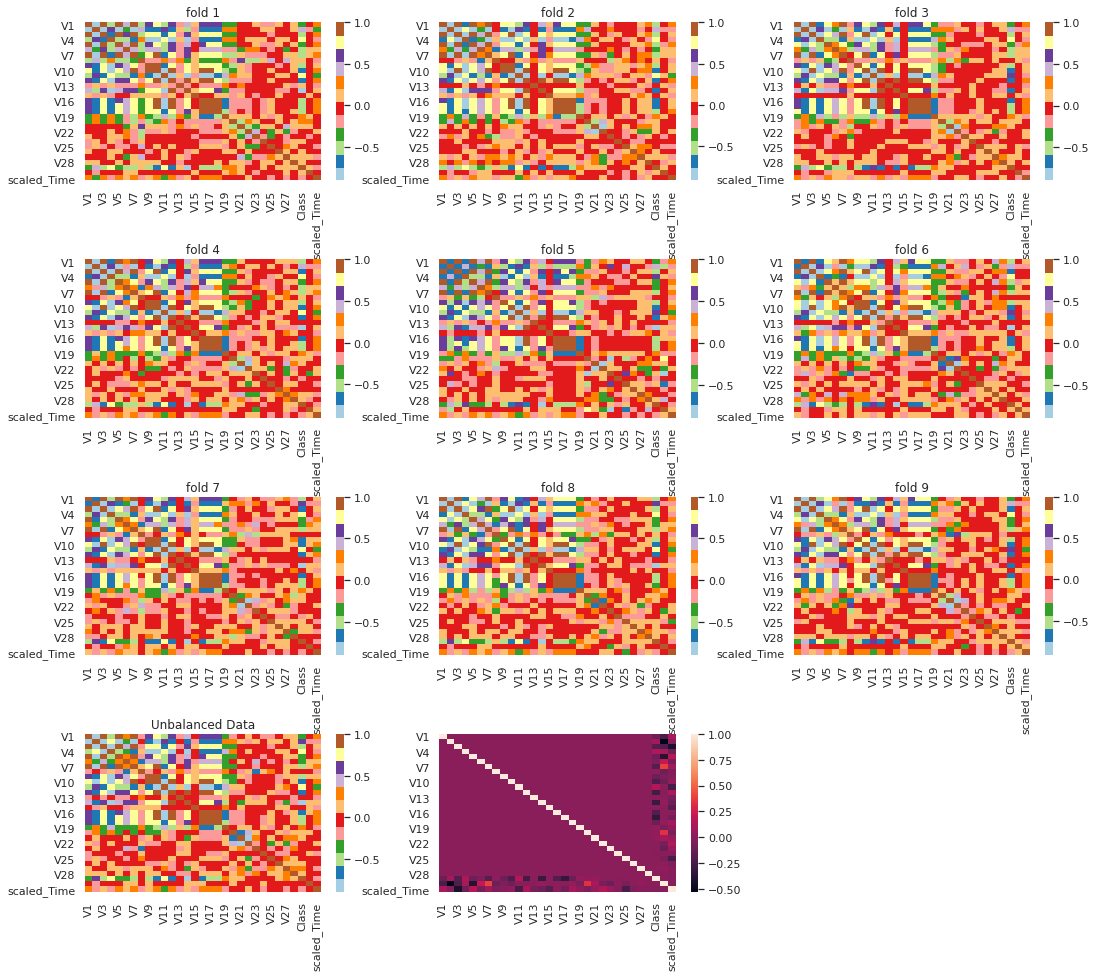

In [ ]:
#subploting
sns.set_theme() #diff colors , aesthetics
fig = plt.figure(figsize=(18,16))
plt.subplots_adjust(hspace=0.5)
for i in range(1,folds+1):
  ax = plt.subplot(4,3,i) #rows, cols, index
  ax.set_title('fold {}'.format(i))
  sns.heatmap(fold_list[i-1].corr(), cmap='Paired')

sx = plt.subplot(4,3,i+1)
ax.set_title('Unbalanced Data')
sns.heatmap(df.corr());

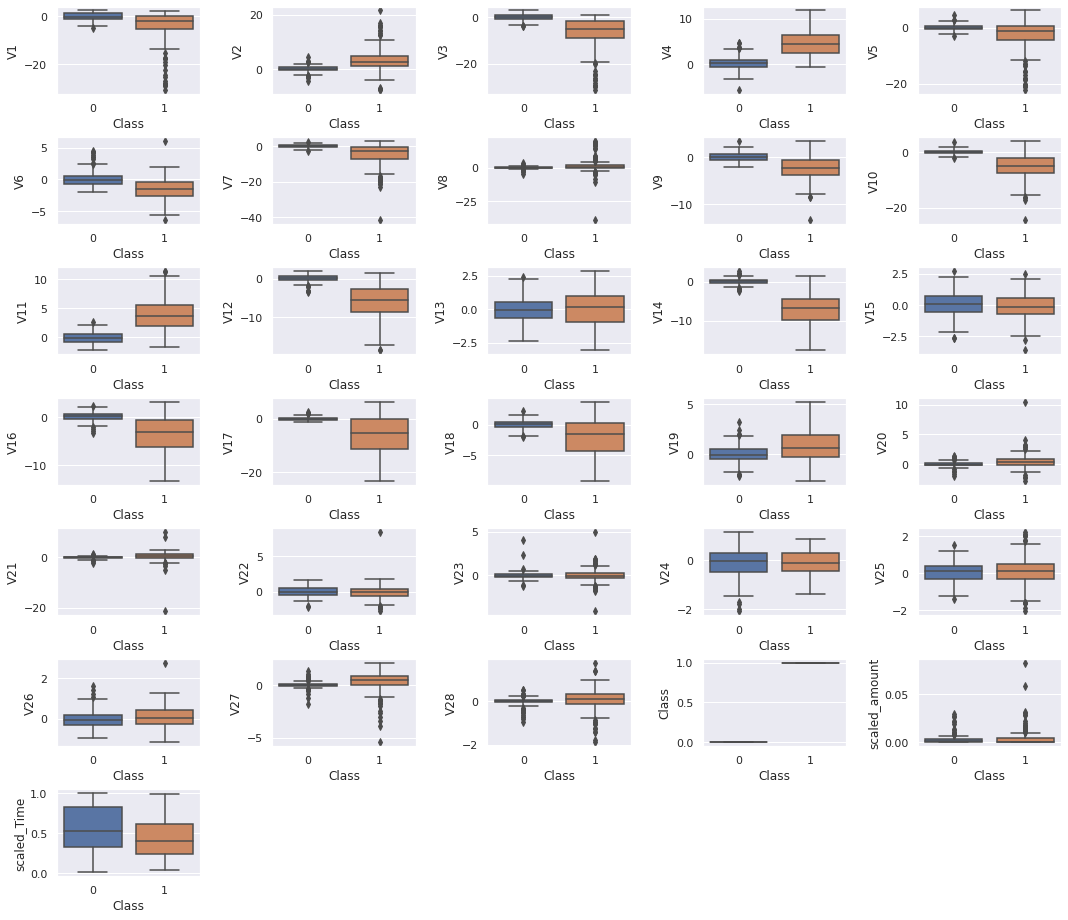

In [ ]:
fig = plt.figure(figsize=(18,16))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
l = len(fold_list[0].columns)
for i in range(1,l+1):
  ax = plt.subplot(7,(l/6),i) #rows, cols, index
  sns.boxplot(y=fold_list[0][df.columns[i-1]], x= fold_list[0]['Class'])

## didnt do outlier removal here as it is not the entire dataset
#iqd = np.percentile(col, 75) - np.percentile(col, 25)

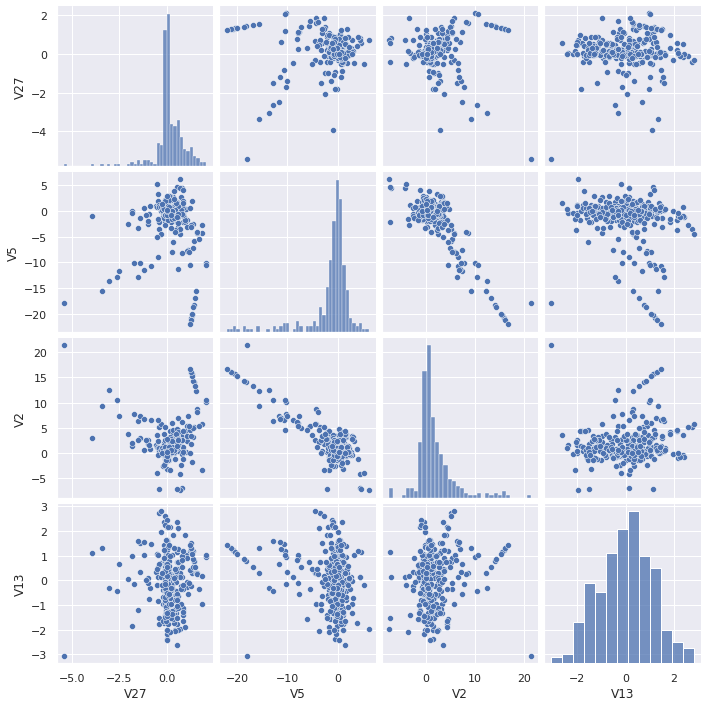

In [ ]:
rands = random.sample(list(fold_list[0].columns), 5)
sns.pairplot(fold_list[0][rands[:-1]]) 
                                    

# SVM


In [ ]:
#for diff kernel values
from sklearn import svm

In [ ]:
clf1 = svm.SVC(kernel='linear')
train_accuracies = []
test_accuracies = []
poly_acc=[]
rbf_acc =[]

for i in range(folds):
  ddd = pd.DataFrame()
  for j in range(folds):
    if j!=i:
      ddd = pd.concat([ddd, fold_list[i]])
  
  Ytrain = ddd['Class']
  Xtrain = ddd.drop('Class', axis=1)
  Ytest = fold_list[i]['Class']
  Xtest = fold_list[i].drop('Class', axis= 1)
  clf1.fit(Xtrain,Ytrain)
  pred = clf1.predict(Xtest)
  train_pred = clf1.predict(Xtrain)
  train_accuracies.append(accuracy_score(Ytrain, train_pred))
  test_accuracies.append(accuracy_score(Ytest, pred))


  poly_clf = svm.SVC(kernel = 'poly')
  poly_clf.fit(Xtrain, Ytrain)
  poly_pred = poly_clf.predict(Xtest)
  poly_acc.append(accuracy_score(Ytest,poly_pred))

  rbf_clf = svm.SVC(kernel = 'rbf')
  rbf_clf.fit(Xtrain, Ytrain)
  rbf_pred = rbf_clf.predict(Xtest)
  rbf_acc.append(accuracy_score(Ytest,rbf_pred))


In [ ]:
print(test_accuracies)
print("mean accuracy is", np.sum(test_accuracies)/len(test_accuracies))

[0.9591836734693877, 0.9931972789115646, 0.9727891156462585, 0.9897959183673469, 0.9693877551020408, 0.9761904761904762, 0.9863945578231292, 0.9795918367346939, 0.9455782312925171, 0.9863945578231292]
mean accuracy is 0.9758503401360544


In [ ]:
print(poly_acc)
print("mean accuracy is", np.sum(poly_acc)/len(poly_acc))

[0.891156462585034, 0.9013605442176871, 0.9149659863945578, 0.9149659863945578, 0.9081632653061225, 0.9115646258503401, 0.9183673469387755, 0.9013605442176871, 0.8979591836734694, 0.9081632653061225]
mean accuracy is 0.9068027210884354


In [ ]:
print(rbf_acc)
print("mean accuracy is", np.sum(rbf_acc)/len(rbf_acc))

[0.9421768707482994, 0.9455782312925171, 0.9489795918367347, 0.9625850340136054, 0.9523809523809523, 0.9489795918367347, 0.9625850340136054, 0.9693877551020408, 0.9455782312925171, 0.95578231292517]
mean accuracy is 0.9534013605442176


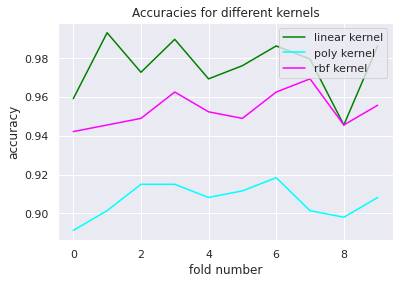

In [ ]:
plt.title("Accuracies for different kernels")
plt.xlabel("fold number")
plt.ylabel("accuracy")
plt.plot(np.arange(folds), test_accuracies, label='linear kernel', color='green')
plt.plot(np.arange(folds), poly_acc, label='poly kernel', color='cyan')
plt.plot(np.arange(folds), rbf_acc, label='rbf kernel', color='magenta' )
plt.legend(loc='best');

In [ ]:
#for whole unbalanced data
dfs = df.drop('Class', axis=1)
whole_pred = clf1.predict(dfs)
linear_acc = accuracy_score(df['Class'], whole_pred)

poly_pred = poly_clf.predict(dfs)
poly_acc = accuracy_score(df['Class'], poly_pred)

rbf_pred = rbf_clf.predict(dfs)
rbf_acc = accuracy_score(df['Class'], rbf_pred)

print("linear kernel acc is ",linear_acc, "\npolynomial kernel acc is ", poly_acc, "\nrbf kernel accuracy is ", rbf_acc )

linear kernel acc is  0.9226599065331962 
polynomial kernel acc is  0.9986095847363302 
rbf kernel accuracy is  0.9781395822434139


In [ ]:
confusion_matrix(df['Class'],whole_pred)

array([[262325,  21990],
       [    37,    455]])

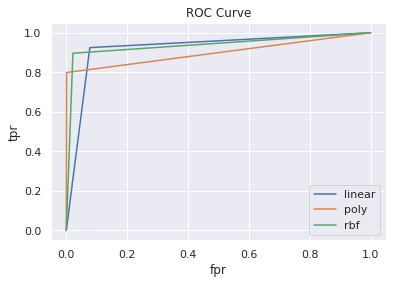

In [ ]:
fl, tl, thl = roc_curve(df['Class'], whole_pred)
fp , tp, thp = roc_curve(df['Class'], poly_pred)
fr , tr, thr = roc_curve(df['Class'], rbf_pred)

plt.title('ROC Curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot(fl,tl, label='linear')
plt.plot(fp,tp, label ='poly')
plt.plot(fr,tr, label='rbf')
plt.legend(loc='best');
